<a href="https://colab.research.google.com/github/azizhaamza/web-scraping/blob/main/webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
from bs4 import BeautifulSoup as bs
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

url='https://www.kayak.fr/Tunis-Hotels.32784.hotel.ksp'
page =urllib.request.urlopen(url)
#charger la page avec bs
soup=bs(page)
print(soup)


<!DOCTYPE html>
<html dir="ltr" lang="fr-fr">
<head>
<meta content="R654d" name="r9-version"/><meta content="20230216.092933" name="r9-built"/><meta content="20230218.184933.+00:00" name="r9-rendered"/><meta content="19" name="r9-build-number"/><style type="text/css">@-webkit-keyframes wiggle{0%{-webkit-transform:rotateZ(8deg);transform:rotateZ(8deg)}50%{-webkit-transform:rotateZ(-8deg);transform:rotateZ(-8deg)}to{-webkit-transform:rotateZ(8deg);transform:rotateZ(8deg)}}@-moz-keyframes wiggle{0%{-webkit-transform:rotateZ(8deg);transform:rotateZ(8deg)}50%{-webkit-transform:rotateZ(-8deg);transform:rotateZ(-8deg)}to{-webkit-transform:rotateZ(8deg);transform:rotateZ(8deg)}}@keyframes wiggle{0%{-webkit-transform:rotateZ(8deg);transform:rotateZ(8deg)}50%{-webkit-transform:rotateZ(-8deg);transform:rotateZ(-8deg)}to{-webkit-transform:rotateZ(8deg);transform:rotateZ(8deg)}}@-webkit-keyframes fadeIn{0%{opacity:0;visibility:hidden}to{opacity:1;visibility:visible}}@-moz-keyframes fadeIn{0%{opacit

In [ ]:
#collecter les données
# cord=soup.findAll("div",class_='soom-description-wrapper')
# print(cord)
hotels=[]
for h in soup.findAll("div",class_='soom-description-wrapper'):
        hotels.append(h.find("div",class_='soom-description').find('span').text.strip())

print(hotels)


['Dar El Medina', 'Le Corail Suites Hotel', 'Occidental Lac Tunis', 'Tunis Grand Hotel', 'El Hana International', 'Barcelo Concorde Les berges du Lac', 'Business Hotel Tunis', 'Sheraton Tunis Hotel', 'The Penthouse Suites Hotel', 'Hotel Le Pacha', 'Majestic Hotel', 'Hôtel La Maison Blanche', 'Hôtel le calife', 'Golden Tulip El Mechtel', 'Adam Hotel Suites', 'Hotel Tiba', 'Hotel Diplomat', 'Hôtel Belvédère Fourati', 'Marigold Hotel', 'Caribbean World Borj Cedria']


In [ ]:
rate=[]
categorie=[]
for r in soup.findAll("div",class_='soom-description-wrapper'):
        x=r.find("div",class_='soom-rating-wrapper').text.strip()
        a=x.split(' ')
        rate.append(a[0])
        if len(a)==2 :
            categorie.append(a[1])
        elif len(a)==3:
            categorie.append(a[1]+" "+a[2])
        elif len(a)==1:
            categorie.append("")
print(categorie)
print(rate)



['Merveilleux', 'Très bien', 'Correct', 'Bien', 'Médiocre', 'Bien', 'Très bien', 'Très bien', 'Bien', 'Bien', 'Très bien', 'Bien', 'Bien', 'Bien', 'Merveilleux', 'Bien', 'Bien', 'Merveilleux', 'Très bien', '']
['9', '8.5', '6.9', '7.1', '4.6', '7.2', '8.3', '8.3', '7.8', '7.2', '8', '7.2', '7.5', '7.6', '9', '7.9', '7.8', '9', '8.1', '']


In [ ]:
prix=[]
for p in soup.findAll("div",class_="soom-rating-wrapper"):
    prix.append(p.findNext(class_="soom-price soom-mod-mobile").text.strip().replace('dès ','').replace("\xa0",'').replace("€",''))
print(prix)


['66', '126', '102', '88', '51', '116', '96', '182', '84', '48', '62', '63', '25', '64', '227', '64', '41', '100', '73', '45']


In [ ]:
#construction d'un dictionnaire avec les differentes listes
dict={'hotels Names':hotels,'Rating':rate,'Categorie':categorie,'price':prix}
print(dict)

{'hotels Names': ['Dar El Medina', 'Le Corail Suites Hotel', 'Occidental Lac Tunis', 'Tunis Grand Hotel', 'El Hana International', 'Barcelo Concorde Les berges du Lac', 'Business Hotel Tunis', 'Sheraton Tunis Hotel', 'The Penthouse Suites Hotel', 'Hotel Le Pacha', 'Majestic Hotel', 'Hôtel La Maison Blanche', 'Hôtel le calife', 'Golden Tulip El Mechtel', 'Adam Hotel Suites', 'Hotel Tiba', 'Hotel Diplomat', 'Hôtel Belvédère Fourati', 'Marigold Hotel', 'Caribbean World Borj Cedria'], 'Rating': ['9', '8.5', '6.9', '7.1', '4.6', '7.2', '8.3', '8.3', '7.8', '7.2', '8', '7.2', '7.5', '7.6', '9', '7.9', '7.8', '9', '8.1', ''], 'Categorie': ['Merveilleux', 'Très bien', 'Correct', 'Bien', 'Médiocre', 'Bien', 'Très bien', 'Très bien', 'Bien', 'Bien', 'Très bien', 'Bien', 'Bien', 'Bien', 'Merveilleux', 'Bien', 'Bien', 'Merveilleux', 'Très bien', ''], 'price': ['66', '126', '102', '88', '51', '116', '96', '182', '84', '48', '62', '63', '25', '64', '227', '64', '41', '100', '73', '45']}


In [ ]:
#création d'un dataframe
df=pd.DataFrame.from_dict(dict)
df

,hotels Names,Rating,Categorie,price
0,Dar El Medina,9,Merveilleux,66
1,Le Corail Suites Hotel,8.5,Très bien,126
2,Occidental Lac Tunis,6.9,Correct,102
3,Tunis Grand Hotel,7.1,Bien,88
4,El Hana International,4.6,Médiocre,51
5,Barcelo Concorde Les berges du Lac,7.2,Bien,116
6,Business Hotel Tunis,8.3,Très bien,96
7,Sheraton Tunis Hotel,8.3,Très bien,182
8,The Penthouse Suites Hotel,7.8,Bien,84
9,Hotel Le Pacha,7.2,Bien,48


In [ ]:
df.head()

,hotels Names,Rating,Categorie,price
0,Dar El Medina,9,Merveilleux,66
1,Le Corail Suites Hotel,8.5,Très bien,126
2,Occidental Lac Tunis,6.9,Correct,102
3,Tunis Grand Hotel,7.1,Bien,88
4,El Hana International,4.6,Médiocre,51


In [ ]:
#convertir dataframe à un csv
df.to_csv('Hotels.csv',index=False,header=True)

In [ ]:
df=pd.read_csv("Hotels.csv")
df

,hotels Names,Rating,Categorie,price
0,Dar El Medina,9.0,Merveilleux,66
1,Le Corail Suites Hotel,8.5,Très bien,126
2,Occidental Lac Tunis,6.9,Correct,102
3,Tunis Grand Hotel,7.1,Bien,88
4,El Hana International,4.6,Médiocre,51
5,Barcelo Concorde Les berges du Lac,7.2,Bien,116
6,Business Hotel Tunis,8.3,Très bien,96
7,Sheraton Tunis Hotel,8.3,Très bien,182
8,The Penthouse Suites Hotel,7.8,Bien,84
9,Hotel Le Pacha,7.2,Bien,48


In [ ]:
df.isnull().sum()

hotels Names    0
Rating          1
Categorie       1
price           0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,hotels Names,Rating,Categorie,price
0,Dar El Medina,9.0,Merveilleux,66
1,Le Corail Suites Hotel,8.5,Très bien,126
2,Occidental Lac Tunis,6.9,Correct,102
3,Tunis Grand Hotel,7.1,Bien,88
4,El Hana International,4.6,Médiocre,51
5,Barcelo Concorde Les berges du Lac,7.2,Bien,116
6,Business Hotel Tunis,8.3,Très bien,96
7,Sheraton Tunis Hotel,8.3,Très bien,182
8,The Penthouse Suites Hotel,7.8,Bien,84
9,Hotel Le Pacha,7.2,Bien,48


In [ ]:
#on a trier data par price
df.sort_values(by=['price'])


,hotels Names,Rating,Categorie,price
12,Hôtel le calife,7.5,Bien,25
16,Hotel Diplomat,7.8,Bien,41
9,Hotel Le Pacha,7.2,Bien,48
4,El Hana International,4.6,Médiocre,51
10,Majestic Hotel,8.0,Très bien,62
11,Hôtel La Maison Blanche,7.2,Bien,63
15,Hotel Tiba,7.9,Bien,64
13,Golden Tulip El Mechtel,7.6,Bien,64
0,Dar El Medina,9.0,Merveilleux,66
18,Marigold Hotel,8.1,Très bien,73


In [ ]:
# on a creer clonne class est on affecter valeur en fonction de prix
# Si price > 100 et <300, attribuez la valeur  "100€-300€"
df.loc[(df['price'] >= 100) & (df['price'] <300), 'class'] = '100€-300€'
# Sinon, si price > 50 et <100, attribuez la valeur '50€-100€'
df.loc[(df['price'] >=50) & (df['price'] <100), 'class'] = '50€-100€'
# Sinon, si price > 0 et <50, attribuez la valeur '0€-50€'
df.loc[(df['price'] >=0) & (df['price'] <50), 'class'] = '0€-50€'

df

,hotels Names,Rating,Categorie,price,class
0,Dar El Medina,9.0,Merveilleux,66,50€-100€
1,Le Corail Suites Hotel,8.5,Très bien,126,100€-300€
2,Occidental Lac Tunis,6.9,Correct,102,100€-300€
3,Tunis Grand Hotel,7.1,Bien,88,50€-100€
4,El Hana International,4.6,Médiocre,51,50€-100€
5,Barcelo Concorde Les berges du Lac,7.2,Bien,116,100€-300€
6,Business Hotel Tunis,8.3,Très bien,96,50€-100€
7,Sheraton Tunis Hotel,8.3,Très bien,182,100€-300€
8,The Penthouse Suites Hotel,7.8,Bien,84,50€-100€
9,Hotel Le Pacha,7.2,Bien,48,0€-50€


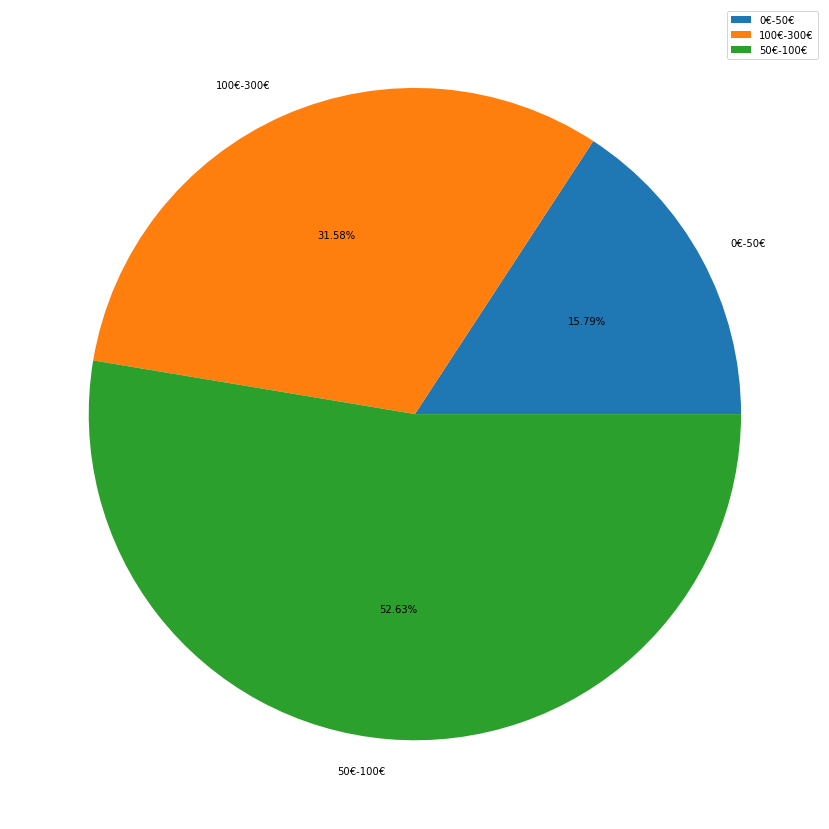

In [ ]:

classmentprix =df.groupby("class")["hotels Names"].count()
classmentprix

plt.figure(figsize=(15,15))
x=classmentprix
plt.pie(x,labels=classmentprix.index,autopct=lambda x:str(round(x,2))+"%")
plt.legend()

In [ ]:
rating =df.groupby("Rating")["hotels Names"].count()
rating

Rating
4.6    1
6.9    1
7.1    1
7.2    3
7.5    1
7.6    1
7.8    2
7.9    1
8.0    1
8.1    1
8.3    2
8.5    1
9.0    3
Name: hotels Names, dtype: int64

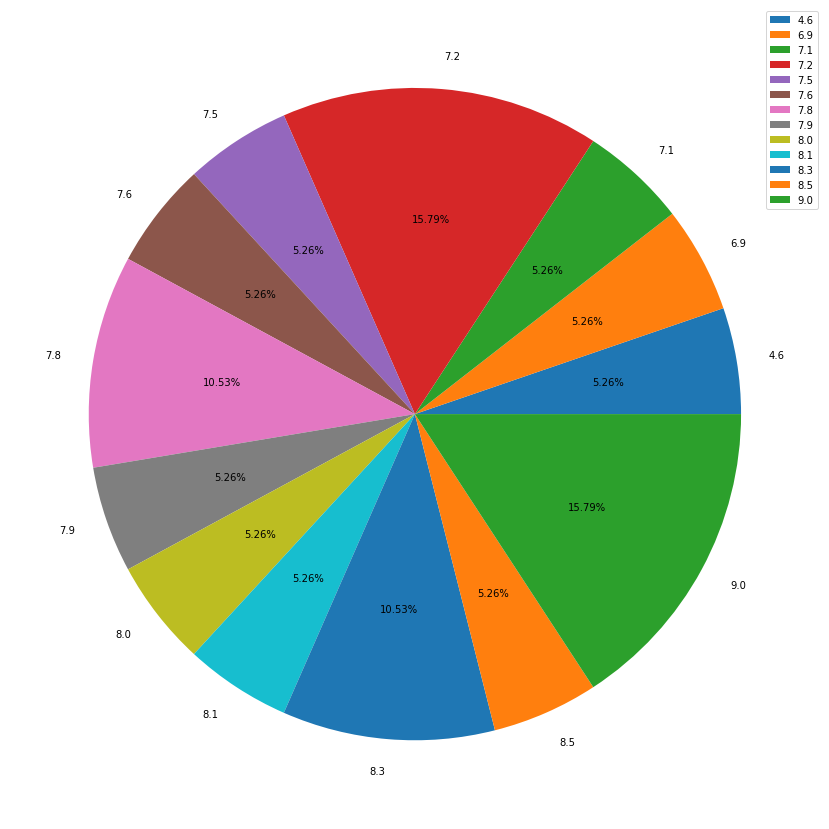

In [ ]:
plt.figure(figsize=(15,15))
x=rating
plt.pie(x,labels=rating.index,autopct=lambda x:str(round(x,2))+"%")
plt.legend()

In [ ]:
Categorie =df.groupby("Categorie")["hotels Names"].count()
Categorie

Categorie
Bien           9
Correct        1
Merveilleux    3
Médiocre       1
Très bien      5
Name: hotels Names, dtype: int64

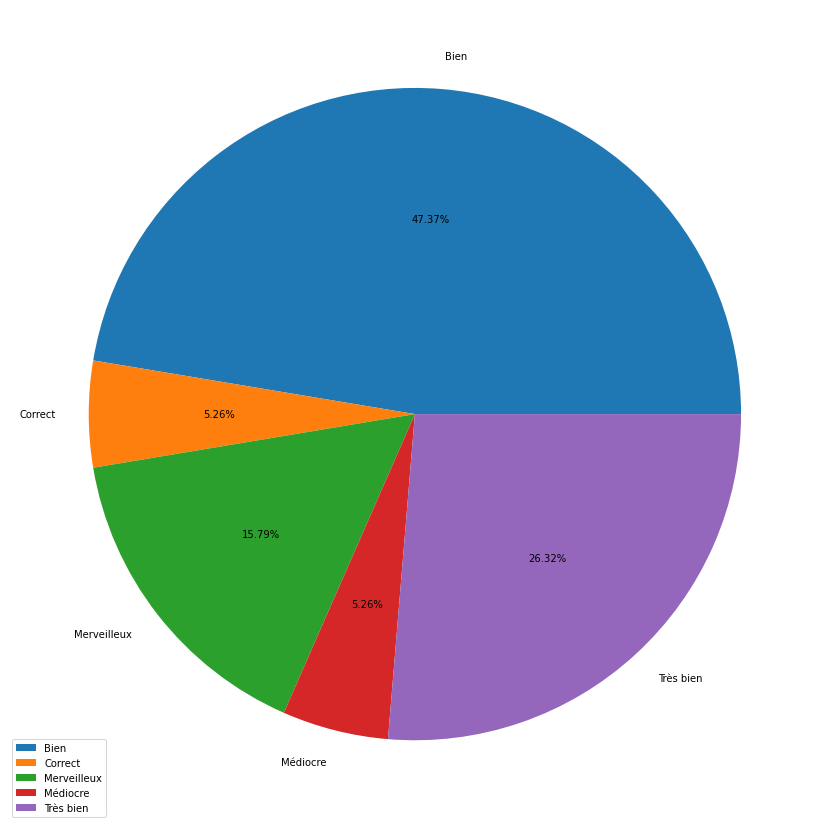

In [ ]:
plt.figure(figsize=(15,15))
x=Categorie
plt.pie(x,labels=Categorie.index,autopct=lambda x:str(round(x,2))+"%")
plt.legend()